In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential, load_model
from keras.layers import LSTM, Dense, Dropout

In [98]:
from google.colab import files
dataset = files.upload()

Saving NKE (2).csv to NKE (2) (1).csv


In [99]:
df=pd.read_csv('NKE (2).csv')

In [100]:
df.shape

(1259, 7)

In [101]:
df=df['Close'].values

In [102]:
df.shape

(1259,)

In [103]:
df=df.reshape(-1,1) # This makes an array of multiple 1 element arrays for each of the prices

In [104]:
train=np.array(df[:int(df.shape[0]*0.8)])
test=np.array(df[int(df.shape[0]*0.8):df.shape[0]]) #The test data is the opening prices for 
print(train.shape)
print(test.shape)

(1007, 1)
(252, 1)


In [105]:
scale=MinMaxScaler(feature_range=(0,1))
train=scale.fit_transform(train)
test=scale.fit_transform(test)

In [106]:
past=65
def create_dataset(df): #This function creates numpy array of multiple arrays of length 'past' as in our network we will use data from 'past' many days
    x = []
    y = []
    for i in range(past, df.shape[0]):
        x.append(df[i-past:i, 0])
        y.append(df[i, 0])
    x = np.array(x)
    y = np.array(y)
    return x,y

In [107]:
x_train, y_train = create_dataset(train)
x_test, y_test = create_dataset(test)


In [108]:
print(x_train)
print(x_train.shape[1])

[[0.02697665 0.02734959 0.03505719 ... 0.04674294 0.0433864  0.03816509]
 [0.02734959 0.03505719 0.02996022 ... 0.0433864  0.03816509 0.03455996]
 [0.03505719 0.02996022 0.02486325 ... 0.03816509 0.03455996 0.04102435]
 ...
 [0.62568372 0.58988068 0.6118846  ... 0.95748385 0.95748385 0.97327208]
 [0.58988068 0.6118846  0.58888612 ... 0.95748385 0.97327208 0.97003983]
 [0.6118846  0.58888612 0.60131775 ... 0.97327208 0.97003983 1.        ]]
65


In [109]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [110]:
model = Sequential()
model.add(LSTM(units=120, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=120,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=120,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=120))
model.add(Dropout(0.2)) #dropout is used to prevent overfitting
model.add(Dense(units=1))

In [111]:
model.compile(loss='mean_squared_error', optimizer='adam')

In [112]:
model.fit(x_train, y_train, epochs=60, batch_size=50)
model.save('stock_prediction.h5')

Epoch 1/60
19/19 [==============================] - 14s 393ms/step - loss: 0.0426
Epoch 2/60
19/19 [==============================] - 7s 387ms/step - loss: 0.0088
Epoch 3/60
19/19 [==============================] - 7s 387ms/step - loss: 0.0051
Epoch 4/60
19/19 [==============================] - 7s 387ms/step - loss: 0.0043
Epoch 5/60
19/19 [==============================] - 7s 391ms/step - loss: 0.0034
Epoch 6/60
19/19 [==============================] - 7s 389ms/step - loss: 0.0034
Epoch 7/60
19/19 [==============================] - 7s 388ms/step - loss: 0.0030
Epoch 8/60
19/19 [==============================] - 7s 390ms/step - loss: 0.0031
Epoch 9/60
19/19 [==============================] - 7s 390ms/step - loss: 0.0033
Epoch 10/60
19/19 [==============================] - 7s 389ms/step - loss: 0.0034
Epoch 11/60
19/19 [==============================] - 7s 390ms/step - loss: 0.0030
Epoch 12/60
19/19 [==============================] - 7s 388ms/step - loss: 0.0027
Epoch 13/60
19/19 [=====

In [113]:
model = load_model('stock_prediction.h5')

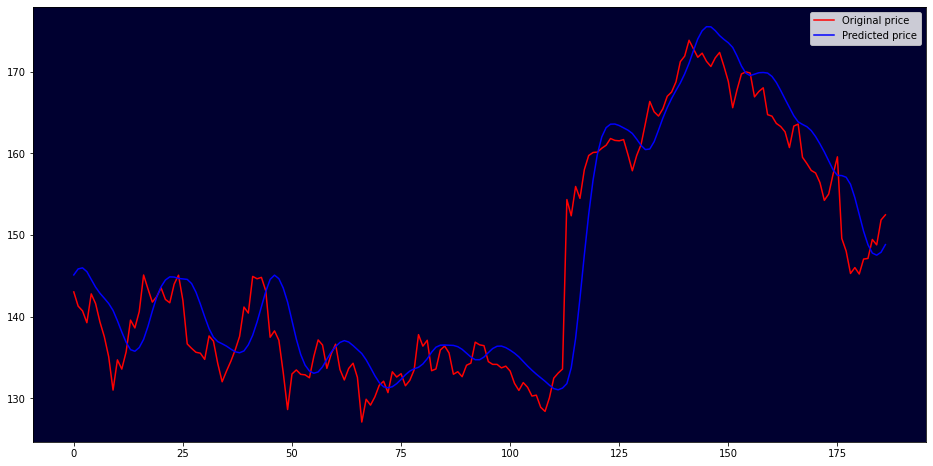

In [114]:


predictions = model.predict(x_test)
predictions = scale.inverse_transform(predictions)
y_test_scaled = scale.inverse_transform(y_test.reshape(-1, 1))

fig, ax = plt.subplots(figsize=(16,8))
ax.set_facecolor('#000030')
ax.plot(y_test_scaled, color='red', label='Original price')
plt.plot(predictions, color='blue', label='Predicted price')
plt.legend()


In [115]:
df=pd.read_csv('NKE (2).csv')

In [116]:
new_df=df['Close'].values

In [117]:
#Get the last 'past' days to predict something in the future
last_days=new_df[-past:]
last_days=np.reshape(last_days, (-1,1))

In [118]:
scale_last_days=scale.transform(last_days)

In [119]:
#Projecting days in future using data that the network generates itself.
#In this case I have projected 20 days into the future
days=20
results=[]
Days=[]
for i in range(days):
  Days.append(i+1)
  Test=[]
  Test.append(scale_last_days[-past:,0])
  Test=np.array(Test)
  Test=np.reshape(Test, (Test.shape[0], Test.shape[1], 1))
  pred=model.predict(Test)
  scale_last_days=np.append(scale_last_days, pred)
  scale_last_days=np.reshape(scale_last_days, (-1,1))
  pred=scale.inverse_transform(pred)
  print(pred)
  
  pred=pred[0][0]
  print(pred)
  results.append(pred)






[[150.18962]]
150.18962
[[151.51907]]
151.51907
[[152.61464]]
152.61464
[[153.47418]]
153.47418
[[154.17921]]
154.17921
[[154.80998]]
154.80998
[[155.4151]]
155.4151
[[156.0138]]
156.0138
[[156.60858]]
156.60858
[[157.19635]]
157.19635
[[157.77426]]
157.77426
[[158.34145]]
158.34145
[[158.8989]]
158.8989
[[159.44849]]
159.44849
[[159.99225]]
159.99225
[[160.53223]]
160.53223
[[161.07025]]
161.07025
[[161.60808]]
161.60808
[[162.1472]]
162.1472
[[162.68921]]
162.68921


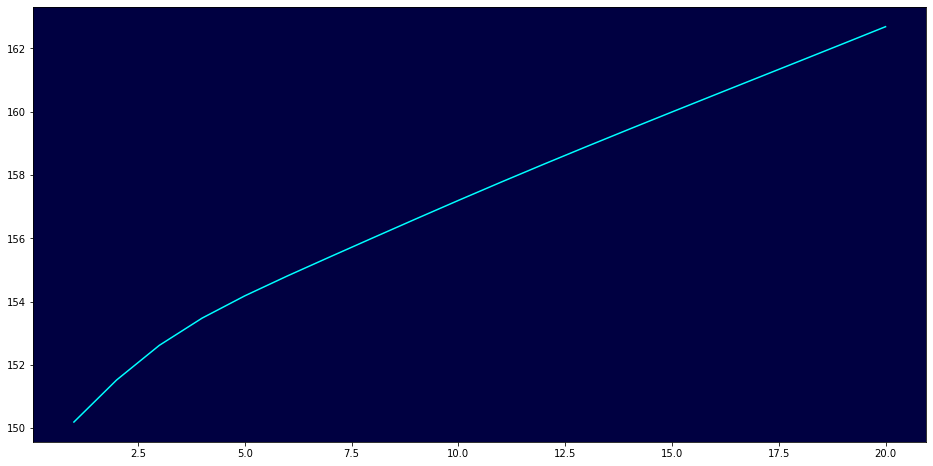

In [120]:
fig, ax = plt.subplots(figsize=(16,8))
ax.set_facecolor('#000041')
ax.plot(Days, results, color='cyan', label='predicted price')

In [121]:
#This code outputs the first predicted day in the future.
results[0]

150.18962